In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scistats
from sklearn.metrics import r2_score
from sklearn.linear_model import (LinearRegression, 
                                  Ridge, Lasso, RidgeCV, LassoCV, 
                                  ElasticNetCV, ElasticNet, 
                                  TheilSenRegressor, RANSACRegressor, HuberRegressor)
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.svm import SVR, LinearSVR
import re
import warnings
#warnings.filterwarnings('ignore')
scaler = StandardScaler()

In [ ]:
# Base dataset
players_and_teams = pd.read_csv('Final_datasets/Cleaned_data/Players_and_teams.csv') # Done

In [ ]:
# Basic info and stats
basic_info = pd.read_csv('Final_datasets/Cleaned_data/Basic_info.csv') # Done
players_app_and_rank = pd.read_csv('Final_datasets/Cleaned_data/Appearences_with_ranking.csv') # Done
injuries_and_age = pd.read_csv('Final_datasets/Cleaned_data/Injuries_and_age.csv') # Done

In [ ]:
# Market value
market_value = pd.read_csv('Final_datasets/Cleaned_data/Market_value.csv')

In [ ]:
market_value

In [ ]:
# Brand value
google_results = pd.read_csv('Final_datasets/Cleaned_data/final_google_results_cleaned.csv') # Done
twitter_thing = pd.read_csv('Final_datasets/Cleaned_data/final_twitter_cleaned.csv') # Done

In [ ]:
# Stats
stats = pd.read_csv('Final_datasets/Cleaned_data/final_stats_merged.csv') # Done

In [ ]:
# Awards
awards = pd.read_csv('Final_datasets/Cleaned_data/Awards_def.csv') # Done

### Mega merging

In [306]:
players_and_teams.head()

,player,lastname,team,team_clas,league,team_country,player_link_tm,player_link_ws,team_ws_link,team_tm_link
0,Max Clark,Clark,Vitesse,Above 200,Eredivise (NET),NET,/max-clark/profil/spieler/183291,/Players/313996/Show/Max-Clark,/Teams/255/Show/Netherlands-Vitesse,/vitesse-arnheim/startseite/verein/499
1,Richonell Margaret,Margaret,Vitesse,Above 200,Eredivise (NET),NET,/richonell-margaret/profil/spieler/465326,/Players/369048/Show/Richonell-Margaret,/Teams/255/Show/Netherlands-Vitesse,/vitesse-arnheim/startseite/verein/499
2,Tim Matavz,Matavz,Vitesse,Above 200,Eredivise (NET),NET,/tim-matavz/profil/spieler/50303,/Players/25518/Show/Tim-Matavz,/Teams/255/Show/Netherlands-Vitesse,/vitesse-arnheim/startseite/verein/499
3,Alexander Büttner,Büttner,Vitesse,Above 200,Eredivise (NET),NET,/alexander-buttner/profil/spieler/38003,/Players/38147/Show/Alexander-Büttner,/Teams/255/Show/Netherlands-Vitesse,/vitesse-arnheim/startseite/verein/499
4,Rasmus Thelander,Thelander,Vitesse,Above 200,Eredivise (NET),NET,/rasmus-thelander/profil/spieler/129092,/Players/81841/Show/Rasmus-Thelander,/Teams/255/Show/Netherlands-Vitesse,/vitesse-arnheim/startseite/verein/499


In [307]:
# Merging basedataset with basic info

basic_info = basic_info.rename(columns = {'name':'player'})
final_dataset = players_and_teams.merge(basic_info, how='inner', on=['player', 'team'])
final_dataset.shape

(1198, 16)

In [308]:
market_value.head()

,current_value,highest_value,last_team,prev_team,prev_prev_team,link,value_loss,current_log,double_trans
0,450000,450000,Vitesse,Hull City,Hull U23,/max-clark/profil/spieler/183291,0,13.017003,2.566256
1,2700000,2700000,Levante,Spezia Calcio,CD Leganés,/sergio-postigo/profil/spieler/158791,0,14.808762,2.695219
2,540000,630000,MSV Duisburg,VfL Osnabrück,Westf. Rhynern,/stanislav-iljutcenko/profil/spieler/191292,-90000,13.199324,2.580166
3,6750000,6750000,Boca Juniors,CD Cruz Azul,Lanús,/ivan-marcone/profil/spieler/90451,0,15.725053,2.755255
4,6300000,6300000,Montpellier,FC Metz,US Créteil,/florent-mollet/profil/spieler/222859,0,15.656060,2.750858


In [309]:
# Merging market value

market_value.drop(['last_team','prev_team','prev_prev_team','current_value'],axis=1,inplace=True)
market_value=market_value.rename(columns = {'link':'player_link_tm'})
final_dataset = final_dataset.merge(market_value, how='inner', on='player_link_tm')

In [310]:
# Merging player apps and rank

players_app_and_rank.columns = ['player_link_tm', 'nationality', 'minutes', 'type_agent', 'pond_min']
final_dataset = final_dataset.merge(players_app_and_rank, how='inner', on='player_link_tm')
final_dataset.shape

(1204, 24)

In [311]:
# Merging injuries data

injuries_and_age=injuries_and_age.rename(columns = {'link':'player_link_tm'})
final_dataset = final_dataset.merge(injuries_and_age, how='inner', on='player_link_tm')
final_dataset.shape

(1204, 28)

In [312]:
# Merging google data

google_results=google_results.rename(columns = {'link':'player_link_tm'})
final_dataset = final_dataset.merge(google_results, how='inner', on='player_link_tm')
final_dataset.shape

(1212, 31)

In [313]:
# Some extra cleaning for the twitter data

twitter_thing['player_link_clean'] = [str(x).replace('0 ','') for x in twitter_thing.Link]
twitter_thing.drop(['Link','Positive','Negative','Neutral','Keyword'], axis=1, inplace=True)
final_dataset.shape

(1212, 31)

In [314]:
# Merging twitter data

twitter_thing['player_link_ws'] = [re.findall(r'\S+(?=\n1)', x)[0] for x in twitter_thing.player_link_clean]
twitter_thing.drop('player_link_clean',axis=1,inplace=True)
final_dataset = final_dataset.merge(twitter_thing, how='left', on='player_link_ws')
final_dataset.shape

(1212, 32)

In [315]:
final_dataset.fillna(value=0, inplace=True)

In [316]:
# Merging stats

stats=stats.rename(columns = {'link':'player_link_ws'})
final_dataset = final_dataset.merge(stats, how='inner', on='player_link_ws')
final_dataset.shape

(1155, 94)

In [317]:
# Merging awards

awards=awards.rename(columns = {'link':'player_link_tm'})
final_dataset = final_dataset.merge(awards, how='inner', on='player_link_tm')
final_dataset.shape

(1171, 117)

In [318]:
final_dataset.head()

,player,lastname,team,team_clas,league,team_country,player_link_tm,player_link_ws,team_ws_link,team_tm_link,...,FIFA Club World Cup winner,Olympic medalist,League T2 Runner-up,Second place at the Olympic Games,Third place at the Olympic Games,World Cup participant,World Cup runner-up,World Cup third place,World Cup winner,total_awards
0,Max Clark,Clark,Vitesse,Above 200,Eredivise (NET),NET,/max-clark/profil/spieler/183291,/Players/313996/Show/Max-Clark,/Teams/255/Show/Netherlands-Vitesse,/vitesse-arnheim/startseite/verein/499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Richonell Margaret,Margaret,Vitesse,Above 200,Eredivise (NET),NET,/richonell-margaret/profil/spieler/465326,/Players/369048/Show/Richonell-Margaret,/Teams/255/Show/Netherlands-Vitesse,/vitesse-arnheim/startseite/verein/499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Tim Matavz,Matavz,Vitesse,Above 200,Eredivise (NET),NET,/tim-matavz/profil/spieler/50303,/Players/25518/Show/Tim-Matavz,/Teams/255/Show/Netherlands-Vitesse,/vitesse-arnheim/startseite/verein/499,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
3,Alexander Büttner,Büttner,Vitesse,Above 200,Eredivise (NET),NET,/alexander-buttner/profil/spieler/38003,/Players/38147/Show/Alexander-Büttner,/Teams/255/Show/Netherlands-Vitesse,/vitesse-arnheim/startseite/verein/499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,Rasmus Thelander,Thelander,Vitesse,Above 200,Eredivise (NET),NET,/rasmus-thelander/profil/spieler/129092,/Players/81841/Show/Rasmus-Thelander,/Teams/255/Show/Netherlands-Vitesse,/vitesse-arnheim/startseite/verein/499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [319]:
final_dataset.drop_duplicates(subset=['player_link_tm','player_link_ws'], inplace=True)

### Droping and dummifying

In [320]:
final_link_ws = final_dataset.pop('player_link_ws')

In [321]:
final_link_tm = final_dataset.pop('player_link_tm')

In [322]:
final_dataset.shape

(1140, 115)

In [323]:
final_dataset.head()

,player,lastname,team,team_clas,league,team_country,team_ws_link,team_tm_link,position,height,...,FIFA Club World Cup winner,Olympic medalist,League T2 Runner-up,Second place at the Olympic Games,Third place at the Olympic Games,World Cup participant,World Cup runner-up,World Cup third place,World Cup winner,total_awards
0,Max Clark,Clark,Vitesse,Above 200,Eredivise (NET),NET,/Teams/255/Show/Netherlands-Vitesse,/vitesse-arnheim/startseite/verein/499,Defender (Left),180.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Richonell Margaret,Margaret,Vitesse,Above 200,Eredivise (NET),NET,/Teams/255/Show/Netherlands-Vitesse,/vitesse-arnheim/startseite/verein/499,Midfielder,176.828333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Tim Matavz,Matavz,Vitesse,Above 200,Eredivise (NET),NET,/Teams/255/Show/Netherlands-Vitesse,/vitesse-arnheim/startseite/verein/499,Forward,188.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
3,Alexander Büttner,Büttner,Vitesse,Above 200,Eredivise (NET),NET,/Teams/255/Show/Netherlands-Vitesse,/vitesse-arnheim/startseite/verein/499,Defender (Left),174.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,Rasmus Thelander,Thelander,Vitesse,Above 200,Eredivise (NET),NET,/Teams/255/Show/Netherlands-Vitesse,/vitesse-arnheim/startseite/verein/499,Defender (Centre),190.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [324]:
final_dataset = final_dataset.rename(columns = {'minutes':'nat_team_min', 
                                                'pond_min': 'nat_team_min_pond',
                                               'results': 'google_res',
                                               'res_stand': 'stand_goog_res'})

In [325]:
final_dataset.drop(['player','lastname','team','team_country',
                   'team_ws_link','team_tm_link','position','nationality','search','last_team_x',
                   'last_team_y', 'last_team', 'last_season'], axis=1, inplace=True)

In [326]:
numeric_final_features = final_dataset.select_dtypes(np.number)

In [327]:
string_final_features = final_dataset.select_dtypes(exclude=np.number)

In [328]:
dum_string_final_features = pd.get_dummies(string_final_features, drop_first=True)

In [329]:
dum_final = pd.concat([dum_string_final_features, numeric_final_features], axis=1, ignore_index=False)

In [330]:
dum_final.shape

(1140, 130)

In [331]:
dum_final.to_csv(r'/Users/gonzaloferreiro/Documents/GA_Materials/DS_Inmersive/DSI8-lessons/projects/project-capstone/Moving_forward/Final_datasets/Working_files/dum_final.csv', index=False)

In [332]:
dum_final = pd.read_csv('/Users/gonzaloferreiro/Documents/GA_Materials/DS_Inmersive/DSI8-lessons/projects/project-capstone/Moving_forward/Final_datasets/Working_files/dum_final.csv')

In [333]:
dum_final.shape

(1140, 130)

### Models on teams

#### Simple linear regression

In [334]:
complete_market_value_df = pd.read_csv('Final_datasets/Cleaned_data/Market_value.csv')

In [335]:
complete_market_value_df.head()

,current_value,highest_value,last_team,prev_team,prev_prev_team,link,value_loss,current_log,double_trans
0,450000,450000,Vitesse,Hull City,Hull U23,/max-clark/profil/spieler/183291,0,13.017003,2.566256
1,2700000,2700000,Levante,Spezia Calcio,CD Leganés,/sergio-postigo/profil/spieler/158791,0,14.808762,2.695219
2,540000,630000,MSV Duisburg,VfL Osnabrück,Westf. Rhynern,/stanislav-iljutcenko/profil/spieler/191292,-90000,13.199324,2.580166
3,6750000,6750000,Boca Juniors,CD Cruz Azul,Lanús,/ivan-marcone/profil/spieler/90451,0,15.725053,2.755255
4,6300000,6300000,Montpellier,FC Metz,US Créteil,/florent-mollet/profil/spieler/222859,0,15.656060,2.750858


In [336]:
y_teams = complete_market_value_df.pop('current_log')

In [337]:
complete_market_value_df = complete_market_value_df[['last_team','prev_team','prev_prev_team']]

In [338]:
dum_complete_market_value_df = pd.get_dummies(complete_market_value_df,drop_first=True)

In [339]:
dum_complete_market_value_df.shape

(1200, 1639)

In [340]:
X_train_teams, X_test_teams, y_train_teams, y_test_teams = train_test_split(
dum_complete_market_value_df, y_teams, test_size = 0.20, random_state=123)

In [341]:
scaler = StandardScaler()
X_train_teams = pd.DataFrame(scaler.fit_transform(X_train_teams),columns=X_train_teams.columns)
X_test_teams = pd.DataFrame(scaler.transform(X_test_teams),columns=X_train_teams.columns)

In [342]:
reg_teams = LinearRegression()

scores = cross_val_score(reg_teams, X_train_teams, y_train_teams, cv=5)
print('Mean cross-validated training score:', scores.mean())

reg_teams.fit(X_train_teams, y_train_teams)
print('Training score:', reg_teams.score(X_train_teams, y_train_teams))

print('Test score:', reg_teams.score(X_test_teams, y_test_teams))

Mean cross-validated training score: -4.447108201402818e+27
Training score: 0.8652943787405634
Test score: -4.10808403630116e+27


#### Ridge

In [72]:
def alpha_scores(model, alpha_values, X_train, y_train):
    scores = []
    for alpha in alpha_values:
        model_ = model(alpha)
        scores.append(np.mean(cross_val_score(
            model_, X_train, y_train, cv=5)))
    return scores

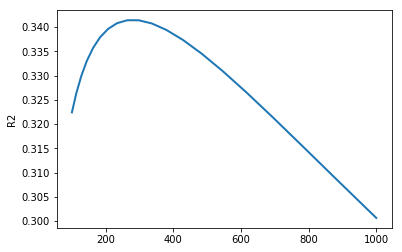

In [77]:
alpha_values = np.logspace(2,3,20)
scores = alpha_scores(Ridge, alpha_values, X_train_teams, y_train_teams)

plt.plot(alpha_values, [score for score in scores], lw=2)
plt.ylabel('R2')
plt.show()

In [78]:
model_ridge_teams = RidgeCV(alphas=np.logspace(2,3,20), cv=5)

model_ridge_teams.fit(X_train_teams, y_train_teams)

print('Best alpha:', model_ridge_teams.alpha_)

print('Training score:', model_ridge_teams.score(X_train_teams, y_train_teams))

print('Test score:', model_ridge_teams.score(X_test_teams, y_test_teams))

scores = cross_val_score(model_ridge_teams, X_train_teams, y_train_teams, cv=5)
print('Mean cross-validated training score:', scores.mean())

Best alpha: 263.6650898730358
Training score: 0.9493207456398254
Test score: 0.3282533385099068
Mean cross-validated training score: 0.33832415353733525


#### Lasso

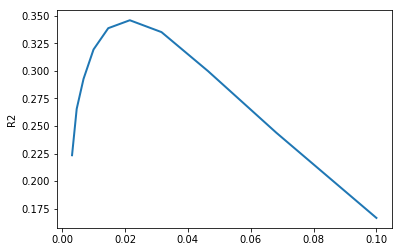

In [343]:
alpha_values = np.logspace(-2.5,-1,10)
scores = alpha_scores(Lasso, alpha_values, X_train_teams, y_train_teams)

plt.plot(alpha_values, [score for score in scores], lw=2)
plt.ylabel('R2')
plt.show()

In [344]:
lasso_model_teams = LassoCV(alphas=np.logspace(-2.5,-1,10), cv=5, 
                      tol=0.1, fit_intercept=True)

lasso_model_teams.fit(X_train_teams, y_train_teams)

print('Best alpha:', lasso_model_teams.alpha_)

print('Training score:', lasso_model_teams.score(X_train_teams, y_train_teams))

print('Test score:', lasso_model_teams.score(X_test_teams, y_test_teams))

scores = cross_val_score(lasso_model_teams, X_train_teams, y_train_teams, cv=5)
print('Mean cross-validated training score:', scores.mean())

Best alpha: 0.01467799267622069
Training score: 0.9029305248882011
Test score: 0.3660484124228397
Mean cross-validated training score: 0.4064225282091384


#### Feature importance

In [345]:
df_coef_teams = pd.DataFrame({'coef': lasso_model_teams.coef_,
                        'variable': X_train_teams.columns,
                        'coef_abs': np.abs(lasso_model_teams.coef_)})

df_coef_teams.sort_values(by='coef_abs', ascending=False).head()

,coef,variable,coef_abs
105,0.237923,last_team_FC Barcelona,0.237923
21,0.197308,last_team_Arsenal,0.197308
209,0.197173,last_team_RB Leipzig,0.197173
166,0.182207,last_team_Liverpool,0.182207
255,0.176827,last_team_Spurs,0.176827


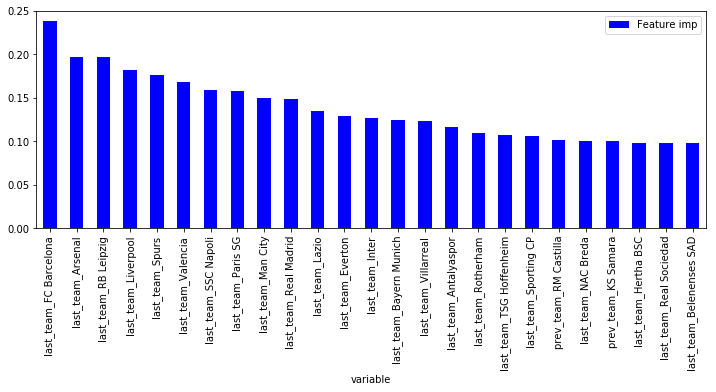

In [346]:
df_coef_teams.sort_values(by='coef_abs', ascending=False).head(25). \
plot(kind='bar', x='variable', y='coef_abs',
      color='b', figsize=(12,4), label='Feature imp')

plt.show()

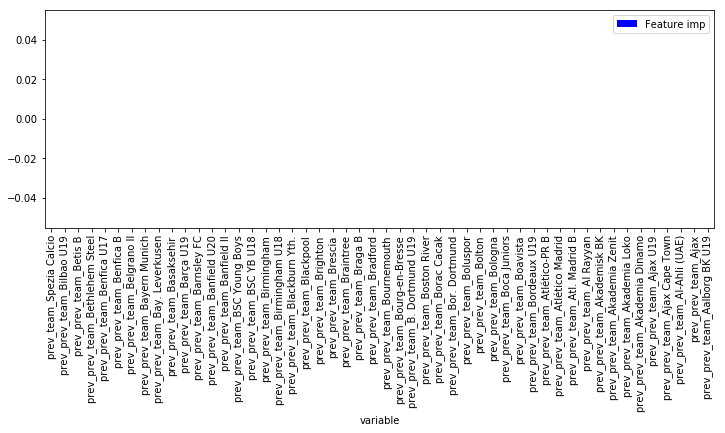

In [347]:
df_coef_teams.sort_values(by='coef_abs').head(50). \
plot(kind='bar', x='variable', y='coef_abs',
      color='b', figsize=(12,4), label='Feature imp')

plt.show()

In [348]:
df_coef_teams.sort_values(by='coef_abs', ascending=False, inplace=True)

In [349]:
df_coef_teams['order'] = [x for x in range(1,len(df_coef_teams)+1)]

In [350]:
shitty_vars_teams = df_coef_teams.variable[df_coef_teams.coef_abs == 0].values

In [351]:
cool_vars_teams = list(df_coef_teams.variable[~df_coef_teams.variable.isin(shitty_vars_teams)])

In [352]:
cool_cool_vars_teams = df_coef_teams.variable[df_coef_teams.coef_abs > 0.16].values

In [353]:
filtered_teams = dum_complete_market_value_df.loc[:,cool_cool_vars_teams]

In [354]:
filtered_teams.shape

(1200, 6)

#### Setting up data for mega model

In [355]:
for_link = pd.read_csv('Final_datasets/Cleaned_data/Market_value.csv')

In [356]:
y_teams_look = pd.concat([y_teams, for_link.link],axis=1)

In [357]:
filtered_teams_wlink = filtered_teams.copy()

In [358]:
filtered_teams_wlink['link'] = for_link.link

In [359]:
filtered_teams_wlink.shape

(1200, 7)

### Complete final dataset

#### Linear Regression

In [360]:
y_2 = dum_final.pop('double_trans')

In [361]:
y = dum_final.pop('current_log')

In [362]:
X_train_test = dum_final.drop('highest_value', axis=1)

In [365]:
X_train, X_test, y_train, y_test = train_test_split(
dum_final, y, test_size = 0.20, random_state=123)

In [366]:
scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_std = pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)

In [369]:
test_model = LinearRegression()

test_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [370]:
scores = cross_val_score(test_model, X_train_std, y_train, cv=5)
print('Mean cross-validated training score:', scores.mean())

print('Training score:', test_model.score(X_train_std, y_train))

print('Test score:', test_model.score(X_test_std, y_test))

Mean cross-validated training score: -1.8268162697614518e+20
Training score: -65343.95229389752
Test score: -69859.8905656904


In [236]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
dum_final, y_2, test_size = 0.20, random_state=123)

In [237]:
scaler = StandardScaler()
X_train_2_std = pd.DataFrame(scaler.fit_transform(X_train_2),columns=X_train.columns)
X_test_2_std = pd.DataFrame(scaler.transform(X_test_2),columns=X_train.columns)

In [238]:
test_model = LinearRegression()

scores = cross_val_score(test_model, X_train_2_std, y_train_2, cv=5)
print('Mean cross-validated training score:', scores.mean())

test_model.fit(X_train_2_std, y_train_2)
print('Training score:', test_model.score(X_train_2_std, y_train_2))

print('Test score:', test_model.score(X_test_2_std, y_test_2))

Mean cross-validated training score: -1.9672789105862974e+20
Training score: 0.8024672869657622
Test score: 0.6862324823814339


#### Ridge

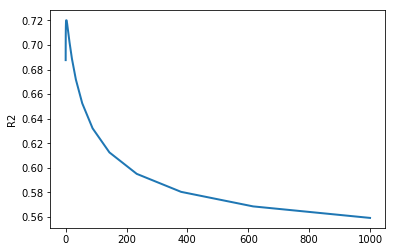

In [239]:
alpha_values = np.logspace(-1,3,20)
scores = alpha_scores(Ridge, alpha_values, X_train, y_train)

plt.plot(alpha_values, [score for score in scores], lw=2)
plt.ylabel('R2')
plt.show()

In [240]:
# Best without standardization

model_ridge = RidgeCV(alphas=np.logspace(-1,3,20), cv=5)

model_ridge.fit(X_train, y_train)

print('Best alpha:', model_ridge.alpha_)

print('Training score:', model_ridge.score(X_train, y_train))

print('Test score:', model_ridge.score(X_test, y_test))

scores = cross_val_score(model_ridge, X_train, y_train, cv=5)
print('Mean cross-validated training score:', scores.mean())

Best alpha: 1.8329807108324356
Training score: 0.805622211698916
Test score: 0.7849917559884695
Mean cross-validated training score: 0.7191504114671776


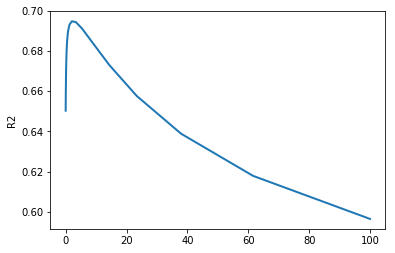

In [241]:
alpha_values = np.logspace(-2,2,20)
scores = alpha_scores(Ridge, alpha_values, X_train_2, y_train_2)

plt.plot(alpha_values, [score for score in scores], lw=2)
plt.ylabel('R2')
plt.show()

In [242]:
model_ridge_2 = RidgeCV(alphas=np.logspace(-2,2,20), cv=5)

model_ridge_2.fit(X_train_2, y_train_2)

print('Best alpha:', model_ridge_2.alpha_)

print('Training score:', model_ridge_2.score(X_train_2, y_train_2))

print('Test score:', model_ridge_2.score(X_test_2, y_test_2))

scores = cross_val_score(model_ridge_2, X_train_2, y_train_2, cv=5)
print('Mean cross-validated training score:', scores.mean())

Best alpha: 2.06913808111479
Training score: 0.7853354957856242
Test score: 0.758485919583862
Mean cross-validated training score: 0.6936531935695541


#### Lasso

##### Initial models

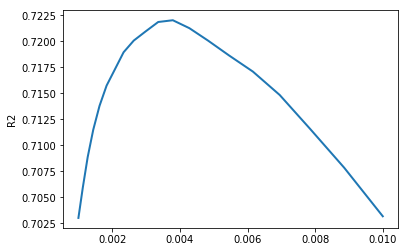

In [243]:
alpha_values = np.logspace(-3,-2,20)
scores = alpha_scores(Lasso, alpha_values, X_train, y_train)

plt.plot(alpha_values, [score for score in scores], lw=2)
plt.ylabel('R2')
plt.show()

In [244]:
lasso_model = LassoCV(alphas=np.logspace(-3,-2,30), cv=5, 
                      tol=0.1, fit_intercept=True)

lasso_model.fit(X_train, y_train)

print('Best alpha:', lasso_model.alpha_)

print('Training score:', lasso_model.score(X_train, y_train))

print('Test score:', lasso_model.score(X_test, y_test))

scores = cross_val_score(lasso_model, X_train, y_train, cv=5)
print('Mean cross-validated training score:', scores.mean())

Best alpha: 0.0038566204211634724
Training score: 0.7890218658720036
Test score: 0.7792822140130582
Mean cross-validated training score: 0.7204723586370236


In [245]:
lasso_pred = lasso_model.predict(X_test)

In [246]:
lasso_res = y_test - lasso_pred

In [247]:
from statsmodels.graphics.gofplots import qqplot

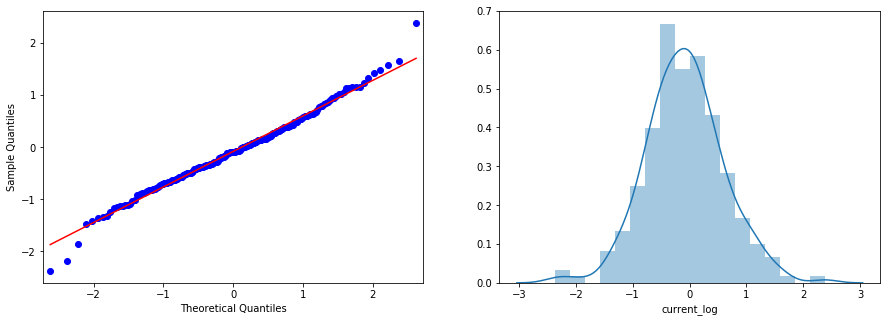

In [248]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
qqplot(lasso_res, line='s', ax=ax[0]);
sns.distplot(lasso_res, ax=ax[1]);
plt.show()

##### Checking feature importance and filtering a new dataset

In [249]:
df_coef = pd.DataFrame({'coef': lasso_model.coef_,
                        'variable': X_train.columns,
                        'coef_abs': np.abs(lasso_model.coef_)})

df_coef.sort_values(by='coef_abs', ascending=False).head()

,coef,variable,coef_abs
32,-1.967787,age_group_Plus_35,1.967787
4,-0.769040,league_Bundesliga 2 (GER),0.769040
31,-0.747800,age_group_31-34,0.747800
0,0.597642,team_clas_Top 10,0.597642
70,0.580727,last_rating,0.580727


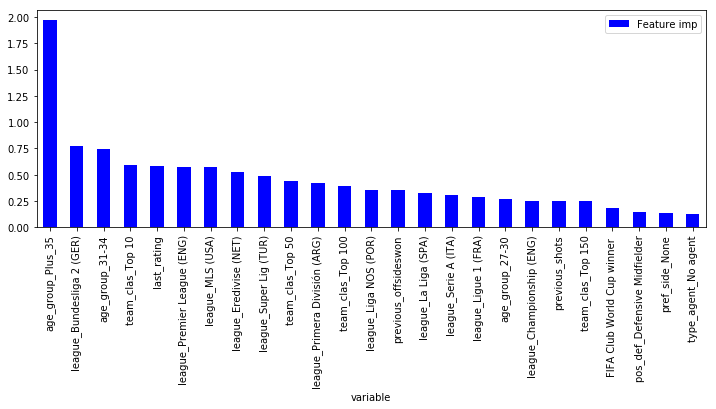

In [250]:
df_coef.sort_values(by='coef_abs', ascending=False).head(25). \
plot(kind='bar', x='variable', y='coef_abs',
      color='b', figsize=(12,4), label='Feature imp')

plt.show()

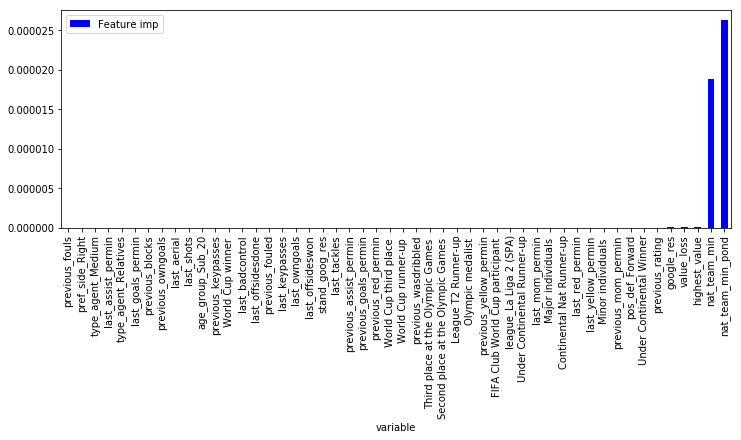

In [251]:
df_coef.sort_values(by='coef_abs').head(50). \
plot(kind='bar', x='variable', y='coef_abs',
      color='b', figsize=(12,4), label='Feature imp')

plt.show()

In [252]:
df_coef.sort_values(by='coef_abs', ascending=False, inplace=True)

In [253]:
df_coef['order'] = [x for x in range(1,len(df_coef)+1)]

In [254]:
shitty_vars = df_coef.variable[df_coef.coef_abs == 0].values

In [255]:
cool_vars = list(df_coef.variable[~df_coef.variable.isin(shitty_vars)])

In [256]:
filtered_final_dataset = dum_final.loc[:,cool_vars]

In [257]:
filtered_final_dataset.to_csv(r'/Users/gonzaloferreiro/Documents/GA_Materials/DS_Inmersive/DSI8-lessons/projects/project-capstone/Moving_forward/Final_datasets/Working_files/filtered_final_dataset.csv',index=False)

In [258]:
filtered_final_dataset = pd.read_csv('/Users/gonzaloferreiro/Documents/GA_Materials/DS_Inmersive/DSI8-lessons/projects/project-capstone/Moving_forward/Final_datasets/Working_files/filtered_final_dataset.csv')

##### New simple regression on filtered data

In [259]:
X_train_filt, X_test_filt, y_train_filt, y_test_filt = train_test_split(
filtered_final_dataset, y, test_size = 0.20, random_state=123)

In [260]:
X_train_filt_std = pd.DataFrame(scaler.fit_transform(X_train_filt),columns=X_train_filt.columns)
X_test_filt_std = pd.DataFrame(scaler.transform(X_test_filt),columns=X_train_filt.columns)

In [261]:
test_model = LinearRegression()

scores = cross_val_score(test_model, X_train_filt, y_train_filt, cv=5)
print('Mean cross-validated training score:', scores.mean())

test_model.fit(X_train_filt, y_train_filt)
print('Training score:', test_model.score(X_train_filt, y_train_filt))

print('Test score:', test_model.score(X_test_filt, y_test_filt))

Mean cross-validated training score: 0.7377618745583803
Training score: 0.7998152411348329
Test score: 0.7813708502540039


In [262]:
test_model_std = LinearRegression()

scores = cross_val_score(test_model_std, X_train_filt_std, y_train_filt, cv=5)
print('Mean cross-validated training score:', scores.mean())

test_model_std.fit(X_train_filt_std, y_train_filt)
print('Training score:', test_model_std.score(X_train_filt_std, y_train_filt))

print('Test score:', test_model_std.score(X_test_filt_std, y_test_filt))

Mean cross-validated training score: 0.7377618749044359
Training score: 0.7998152411348329
Test score: 0.7813708504784668


##### New Lasso on filtered data

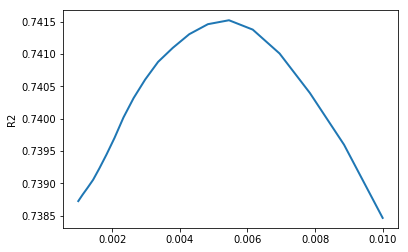

In [263]:
# Better with standardization

alpha_values = np.logspace(-3,-2,20)
scores = alpha_scores(Lasso, alpha_values, X_train_filt_std, y_train_filt)

plt.plot(alpha_values, [score for score in scores], lw=2)
plt.ylabel('R2')
plt.show()

In [264]:
lasso_cool_model = LassoCV(alphas=np.logspace(-3,-2,30), cv=5, 
                      tol=0.1, fit_intercept=True)

lasso_model.fit(X_train_filt_std, y_train_filt)

print('Best alpha:', lasso_model.alpha_)

print('Training score:', lasso_model.score(X_train_filt_std, y_train_filt))

print('Test score:', lasso_model.score(X_test_filt_std, y_test_filt))

scores = cross_val_score(lasso_cool_model, X_train_filt_std, y_train_filt, cv=5)
print('Mean cross-validated training score:', scores.mean())

Best alpha: 0.0032903445623126675
Training score: 0.7911588248602877
Test score: 0.7921819023375072
Mean cross-validated training score: 0.7196528083608288


#### Some neural network thing

In [180]:
from sklearn.neural_network import MLPRegressor

In [181]:
clf = MLPRegressor(max_iter=1000,random_state=1)

In [182]:
from sklearn.model_selection import GridSearchCV

In [183]:
parameters = {'solver': ['lbfgs', 'adam'],
              'activation': ['identity','tanh', 'relu'],
              'alpha': np.logspace(-2,2,5),
              'hidden_layer_sizes': [(10,10,10),(2,2)]}

nnet = GridSearchCV(clf, parameters, cv=3, n_jobs=-1, verbose=1, refit=True)

nnet.fit(X_train, y_train)
print(nnet.score(X_train, y_train))
print(nnet.score(X_test, y_test))
print(nnet.best_params_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.9min finished


0.5252240016623737
0.6083681919477029
{'activation': 'relu', 'alpha': 10.0, 'hidden_layer_sizes': (2, 2), 'solver': 'lbfgs'}


#### Trees

In [725]:
final_basic_tree = DecisionTreeRegressor(random_state=123)

In [769]:
final_basic_tree_params = {'max_depth': [6,7,8],
          'max_features': [107],
          'max_leaf_nodes': [110,111,112],
          'min_samples_leaf': [4],
          'min_samples_split': [15,16,17]
          }

final_basic_tree_grid = GridSearchCV(
        estimator=final_basic_tree,
        param_grid=final_basic_tree_params, cv=5)

final_basic_tree_grid.fit(X_train_std, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=123, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [6, 7, 8], 'max_features': [107], 'max_leaf_nodes': [110, 111, 112], 'min_samples_leaf': [4], 'min_samples_split': [15, 16, 17]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [770]:
final_basic_tree_grid.best_params_

{'max_depth': 7,
 'max_features': 107,
 'max_leaf_nodes': 110,
 'min_samples_leaf': 4,
 'min_samples_split': 16}

In [771]:
final_basic_tree_grid.score(X_test_std, y_test)

0.9245738782887712

### New dataset with only cool features

#### Setting up dataset

In [265]:
filtered_final_dataset_wlink = filtered_final_dataset.copy()

In [266]:
filtered_final_dataset_wlink['link'] = final_link_tm

In [267]:
mega_dataset = filtered_teams_wlink.merge(filtered_final_dataset_wlink, how='inner', on='link')

In [268]:
y_look = pd.concat([y,final_link_tm],axis=1)

In [269]:
y_look = y_look.rename(columns = {'player_link_tm':'link'})

In [270]:
y_mega = y_look.merge(y_teams_look, how='inner', on='link')

In [271]:
y_mega.columns

Index(['current_log_x', 'link', 'current_log_y'], dtype='object')

In [272]:
y_mega.drop('current_log_x',inplace=True,axis=1)

In [273]:
mega_dataset = mega_dataset.merge(y_mega, how='inner', on='link')

In [274]:
y_mega = mega_dataset.pop('current_log_y')

In [275]:
mega_dataset.drop('link',axis=1,inplace=True)

In [159]:
mega_dataset.to_csv(r'/Users/gonzaloferreiro/Documents/GA_Materials/DS_Inmersive/DSI8-lessons/projects/project-capstone/Moving_forward/Final_datasets/Working_files/mega_dataset.csv',index=False)

In [160]:
mega_dataset = pd.read_csv('/Users/gonzaloferreiro/Documents/GA_Materials/DS_Inmersive/DSI8-lessons/projects/project-capstone/Moving_forward/Final_datasets/Working_files/mega_dataset.csv')

#### Simple linear regression

In [276]:
X_train_mega, X_test_mega, y_train_mega, y_test_mega = train_test_split(
mega_dataset, y_mega, test_size = 0.20, random_state=123)

In [277]:
X_train_mega_std = pd.DataFrame(scaler.fit_transform(X_train_mega),columns=X_train_mega.columns)
X_test_mega_std = pd.DataFrame(scaler.transform(X_test_mega),columns=X_train_mega.columns)

In [278]:
X_test_mega.shape

(223, 89)

In [279]:
reg_mega = LinearRegression()

scores = cross_val_score(reg_mega, X_train_mega, y_train_mega, cv=5)
print('Mean cross-validated training score:', scores.mean())

reg_mega.fit(X_train_mega, y_train_mega)
print('Training score:', reg_mega.score(X_train_mega, y_train_mega))

print('Test score:', reg_mega.score(X_test_mega, y_test_mega))

Mean cross-validated training score: -0.001233721474329519
Training score: 0.23734815119314667
Test score: 0.06583157973275955


In [280]:
reg_mega_std = LinearRegression()

scores = cross_val_score(reg_mega_std, X_train_mega_std, y_train_mega, cv=5)
print('Mean cross-validated training score:', scores.mean())

reg_mega_std.fit(X_train_mega_std, y_train_mega)
print('Training score:', reg_mega_std.score(X_train_mega_std, y_train_mega))

print('Test score:', reg_mega_std.score(X_test_mega_std, y_test_mega))

Mean cross-validated training score: -0.001233719321207749
Training score: 0.2373481511931469
Test score: 0.06583158044038906


#### Lasso

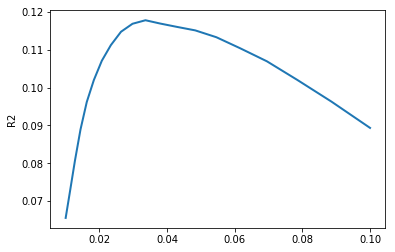

In [281]:
# Standardization doesn't change anything

alpha_values = np.logspace(-2,-1,20)
scores = alpha_scores(Lasso, alpha_values, X_train_mega_std, y_train_mega)

plt.plot(alpha_values, [score for score in scores], lw=2)
plt.ylabel('R2')
plt.show()

In [282]:
model_lasso_mega = RidgeCV(alphas=np.logspace(-2.5,-1.5,20), cv=5)

model_lasso_mega.fit(X_train_mega_std, y_train_mega)

print('Best alpha:', model_lasso_mega.alpha_)

print('Training score:', model_lasso_mega.score(X_train_mega_std, y_train_mega))

print('Test score:', model_lasso_mega.score(X_test_mega_std, y_test_mega))

scores = cross_val_score(model_lasso_mega, X_train_mega_std, y_train_mega, cv=5)
print('Mean cross-validated training score:', scores.mean())

Best alpha: 0.03162277660168379
Training score: 0.2373481328794752
Test score: 0.06591017293541646
Mean cross-validated training score: -0.0010410297426502347


#### Ridge

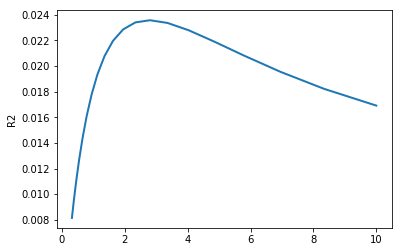

In [284]:
# Standardization makes it a little worst

alpha_values = np.logspace(-0.5,1,20)
scores = alpha_scores(Ridge, alpha_values, X_train_mega, y_train_mega)

plt.plot(alpha_values, [score for score in scores], lw=2)
plt.ylabel('R2')
plt.show()

In [285]:
model_ridge_mega = RidgeCV(alphas=np.logspace(-0.5,1,20), cv=5)

model_ridge_mega.fit(X_train_mega, y_train_mega)

print('Best alpha:', model_ridge_mega.alpha_)

print('Training score:', model_ridge_mega.score(X_train_mega, y_train_mega))

print('Test score:', model_ridge_mega.score(X_test_mega, y_test_mega))

scores = cross_val_score(model_ridge_mega, X_train_mega, y_train_mega, cv=5)
print('Mean cross-validated training score:', scores.mean())

Best alpha: 2.8013567611988677
Training score: 0.2263093619208345
Test score: 0.07877824557421276
Mean cross-validated training score: 0.011613581218758176


In [286]:
pred_ridge_mega = model_ridge_mega.predict(X_train_mega)
ridge_res_mega = [np.abs(x-y) for x,y in zip(y_train_mega, pred_ridge_mega)]

In [287]:
np.max(ridge_res_mega)

4.629733624785482

#### Support Vector Regression [BREAKS CODE - DO NOT RUN]

In [ ]:
np.logspace(-3, 10, 10)

In [ ]:
model_svr = SVR(kernel='rbf', gamma='auto')

params_svr = {
    'C': np.logspace(-3, 2, 5),
    'epsilon': np.linspace(0.001, 2, 5)
}

svr_grid = GridSearchCV(
        estimator=model_svr,
        param_grid=params_svr, cv=5)

svr_grid.fit(X_train_mega, y_train_mega)

In [ ]:
svr_grid.best_score_

#### Trees

In [145]:
basic_tree = DecisionTreeRegressor(random_state=123)

In [146]:
basic_tree.get_params().keys()

dict_keys(['criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [163]:
basic_tree_params = {'max_depth': [8,9,10],
          'max_features': [87,88,89],
          'max_leaf_nodes': np.linspace(85,90,5,dtype=int),
          'min_samples_leaf': [4,5,6,7],
          'min_samples_split': [11,12,14]
          }

basic_tree_grid = GridSearchCV(
        estimator=basic_tree,
        param_grid=basic_tree_params, cv=5)

basic_tree_grid.fit(X_train_mega_std, y_train_mega)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=123, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [8, 9, 10], 'max_features': [87, 88, 89], 'max_leaf_nodes': array([85, 86, 87, 88, 90]), 'min_samples_leaf': [4, 5, 6, 7], 'min_samples_split': [11, 12, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [164]:
basic_tree_grid.best_params_

{'max_depth': 9,
 'max_features': 88,
 'max_leaf_nodes': 88,
 'min_samples_leaf': 4,
 'min_samples_split': 12}

In [165]:
basic_tree_grid.score(X_train_mega_std, y_train_mega)

0.9789914789102725

In [166]:
basic_tree_grid.score(X_test_mega_std, y_test_mega)

0.9182289854607385

In [167]:
tree_pred = basic_tree_grid.predict(X_test_mega)

In [168]:
tree_res = y_test_mega - tree_pred

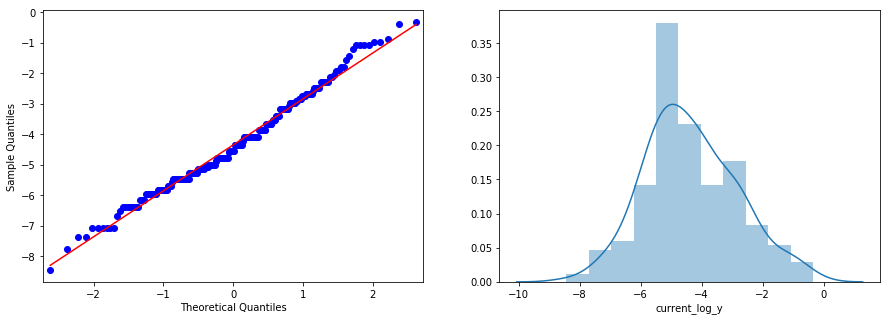

In [169]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
qqplot(tree_res, line='s', ax=ax[0]);
sns.distplot(tree_res, ax=ax[1]);
plt.show()

#### Tree with bagging

In [171]:
tree_to_bag = DecisionTreeRegressor(random_state=123)

In [172]:
bagging_tree = BaggingRegressor(base_estimator=tree_to_bag, random_state=1, n_estimators=1000)

In [173]:
bagging_tree.get_params().keys()

dict_keys(['base_estimator__criterion', 'base_estimator__max_depth', 'base_estimator__max_features', 'base_estimator__max_leaf_nodes', 'base_estimator__min_impurity_decrease', 'base_estimator__min_impurity_split', 'base_estimator__min_samples_leaf', 'base_estimator__min_samples_split', 'base_estimator__min_weight_fraction_leaf', 'base_estimator__presort', 'base_estimator__random_state', 'base_estimator__splitter', 'base_estimator', 'bootstrap', 'bootstrap_features', 'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
bagging_tree_params = {'base_estimator__max_depth': np.linspace(5,15,10,dtype=int),
                       'base_estimator__max_features': np.linspace(80,100,20,dtype=int),
                       'base_estimator__max_leaf_nodes': np.linspace(85,105,20,dtype=int),
                       'base_estimator__min_samples_leaf': np.linspace(1,8,8,dtype=int),
                       'base_estimator__min_samples_split': np.linspace(5,15,10,dtype=int),
                       'bootstrap': [True,False],
                       'bootstrap_feature': [True,False],
                       'max_features': np.linspace(0,1,10),
                       'max_samples': np.linspace(0,1,10)}      
          

basic_tree_grid = GridSearchCV(
        estimator=bagging_tree,
        param_grid=bagging_tree_params, cv=5)

basic_tree_grid.fit(X_train_mega_std, y_train_mega)

### Trying some robust models

#### Ranscac Sklearn

In [609]:
ransac.get_params().keys()

dict_keys(['base_estimator__copy_X', 'base_estimator__fit_intercept', 'base_estimator__n_jobs', 'base_estimator__normalize', 'base_estimator', 'is_data_valid', 'is_model_valid', 'loss', 'max_skips', 'max_trials', 'min_samples', 'random_state', 'residual_threshold', 'stop_n_inliers', 'stop_probability', 'stop_score'])

In [617]:
ransac = RANSACRegressor(base_estimator=LinearRegression(),
                         is_data_valid=None, is_model_valid=None, 
                         loss='absolute_loss', max_skips=1000, 
                         max_trials=2000, min_samples=200, 
                         random_state=123, residual_threshold=2.4, 
                         stop_n_inliers=1000, stop_score=1)

# HuberRegressor with RANSAC shit
# TheilSenRegressor with RANSAC around 0.35

In [618]:
ransac.fit(X_train_mega, y_train_mega)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=1000, max_trials=2000, min_samples=200, random_state=123,
        residual_threshold=2.4, stop_n_inliers=1000, stop_probability=0.99,
        stop_score=1)

In [655]:
ransac.score(X_test_mega,y_test_mega)

0.8171243923642922

In [438]:
scores = cross_val_score(ransac, X_train_mega, y_train_mega, cv=5)
print('Mean cross-validated training score:', scores.mean())

Mean cross-validated training score: 0.7214410978952334


In [473]:
ransac_pred = ransac.estimator_.predict(X_test_mega)

In [474]:
ransac_res = y_test_mega - ransac_pred

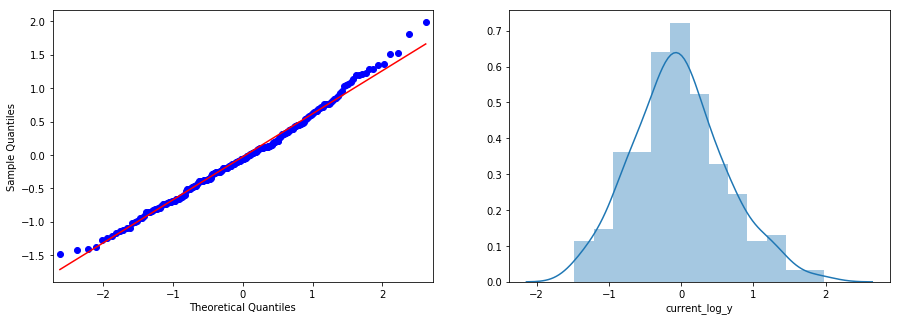

In [475]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
qqplot(ransac_res, line='s', ax=ax[0]);
sns.distplot(ransac_res, ax=ax[1]);
plt.show()

#### Huber Regressor statsmodel

In [539]:
huber_t = sm.OLS(y_train_mega, X_train_mega)
hub_results = huber_t.fit()

In [540]:
mega_pred = hub_results.predict(X_test_mega)

In [541]:
r2_score(y_test_mega, mega_pred)

0.788900817024476

#### Huber Sklearn with Grid Search

In [552]:
hub_model = HuberRegressor(max_iter=10000)

In [588]:
huber_params = {
    'alpha': np.linspace(25, 35, 10),
    'epsilon': np.linspace(45, 55, 5),
    'fit_intercept': [True],
}

huber_grid = GridSearchCV(
        estimator=hub_model,
        param_grid=huber_params, cv=5)

huber_grid.fit(X_train_mega_std, y_train_mega)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=10000,
        tol=1e-05, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([25.     , 26.11111, 27.22222, 28.33333, 29.44444, 30.55556,
       31.66667, 32.77778, 33.88889, 35.     ]), 'epsilon': array([45. , 47.5, 50. , 52.5, 55. ]), 'fit_intercept': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [589]:
huber_grid.best_estimator_

HuberRegressor(alpha=35.0, epsilon=45.0, fit_intercept=True, max_iter=10000,
        tol=1e-05, warm_start=False)

In [590]:
huber_grid.score(X_test_mega_std, y_test_mega)

0.8133078510217235

#### Theil Sen Regressor [DIDN'T WORK]

In [593]:
theil_model = TheilSenRegressor(max_iter=10000, n_jobs=3)

In [592]:
list(theil_model.get_params().keys())

['copy_X',
 'fit_intercept',
 'max_iter',
 'max_subpopulation',
 'n_jobs',
 'n_subsamples',
 'random_state',
 'tol',
 'verbose']

In [606]:
theil_params = {
    'verbose': [True],
    'tol': [0.1,1,2,3,4],
    'fit_intercept': [True]
}

theil_grid = GridSearchCV(
        estimator=theil_model,
        param_grid=theil_params, cv=5)

theil_grid.fit(X_train_mega, y_train_mega)

Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.9s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.3s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.1s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.0s finished


Breakdown point: 0.006492231085747258
Number of samples: 732
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.0s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.1s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.8s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.0s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.0s finished


Breakdown point: 0.006492231085747258
Number of samples: 732
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.2s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.0s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.8s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.9s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.0s finished


Breakdown point: 0.006492231085747258
Number of samples: 732
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.0s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.8s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.8s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.2s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.9s finished


Breakdown point: 0.006492231085747258
Number of samples: 732
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.0s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.9s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.8s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.9s finished


Breakdown point: 0.006490954398717719
Number of samples: 731
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.9s finished


Breakdown point: 0.006492231085747258
Number of samples: 732
Tolerable outliers: 4
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    9.0s finished


Breakdown point: 0.006678065873253702
Number of samples: 914
Tolerable outliers: 6
Number of subpopulations: 10000


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    8.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=10000,
         max_subpopulation=10000, n_jobs=3, n_subsamples=None,
         random_state=None, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'verbose': [True], 'tol': [0.1, 1, 2, 3, 4], 'fit_intercept': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [607]:
theil_grid.best_estimator_

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=10000,
         max_subpopulation=10000, n_jobs=3, n_subsamples=None,
         random_state=None, tol=1, verbose=True)

In [608]:
theil_grid.score(X_test_mega_std, y_test_mega)

-14.982066964607753